In [16]:
! pip install alpha_vantage

In [19]:
import pandas as pd 
import numpy as np 
import clean as cl 
import library_final as lf 
import matplotlib.pyplot as plt 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import alpha_vantage

In [2]:
wba= cl.create_fi('JNJ', 'full')

In [3]:
wba.df.tail()

open    high      low   close     volume
date                                                  
2020-01-02  145.87  145.08  146.020  145.97  5776962.0
2020-01-03  143.50  143.00  145.373  144.28  5752392.0
2020-01-06  144.00  142.85  144.200  144.10  7730593.0
2020-01-07  144.01  141.38  145.450  144.98  7385397.0
2020-01-08  144.87  143.70  145.980  144.96  6605760.0

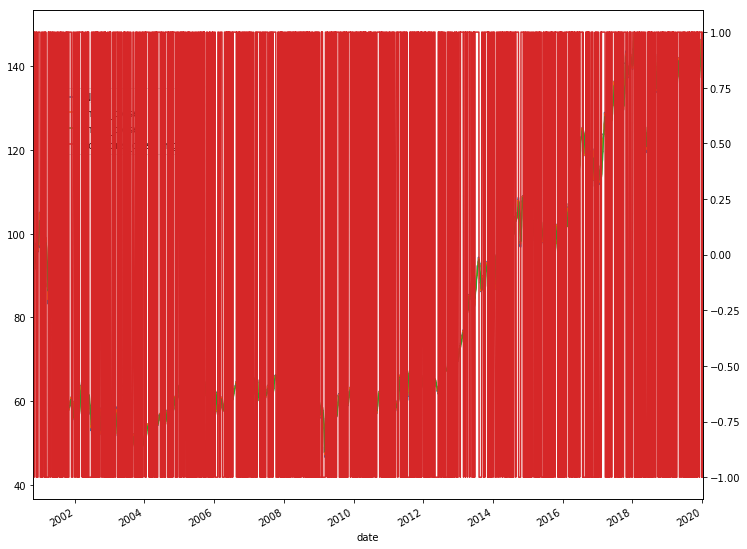

In [4]:
wba_sma_c, wba_ax_c = wba.get_sma(2,6,200, series='close')

In [5]:
wba_sma_c.drop('JNJ', axis=1, inplace=True)
wba_sma_c.head()

sma1_close  sma2_close  positions_close
date                                               
2000-01-07         NaN         NaN               -1
2000-01-10       95.28         NaN               -1
2000-01-11       94.06         NaN               -1
2000-01-12       93.78         NaN               -1
2000-01-13       93.44         NaN               -1

In [6]:
wba_df = wba.df.merge(wba_sma_c, on='date')

In [7]:
wba_df.tail()

open    high      low   close     volume  sma1_close  \
date                                                                 
2020-01-02  145.87  145.08  146.020  145.97  5776962.0     145.920   
2020-01-03  143.50  143.00  145.373  144.28  5752392.0     145.125   
2020-01-06  144.00  142.85  144.200  144.10  7730593.0     144.190   
2020-01-07  144.01  141.38  145.450  144.98  7385397.0     144.540   
2020-01-08  144.87  143.70  145.980  144.96  6605760.0     144.970   

            sma2_close  positions_close  
date                                     
2020-01-02  145.775000                1  
2020-01-03  145.500000               -1  
2020-01-06  145.211667               -1  
2020-01-07  145.083333               -1  
2020-01-08  145.026667               -1

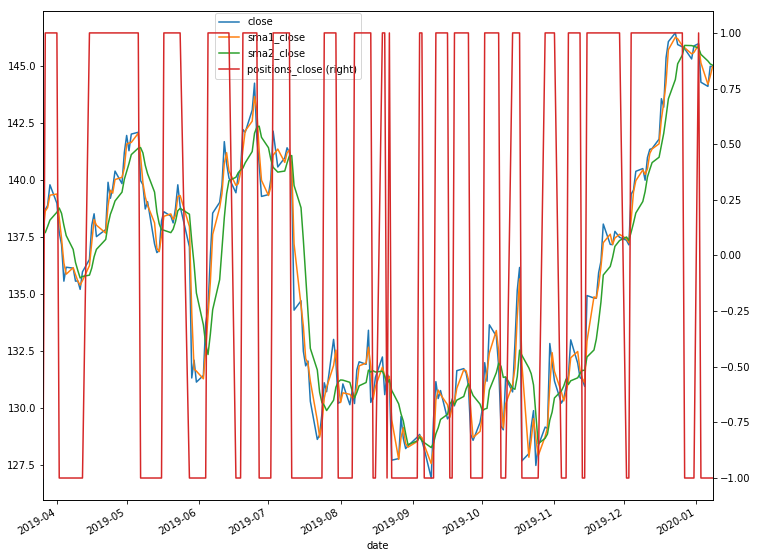

In [8]:
ax = wba_df[['close','sma1_close','sma2_close','positions_close']].iloc[-200:].plot(figsize=(12,10), secondary_y = 'positions_close')
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

In [9]:
adx,_ = cl.get_adx(symbol='WBA')
wba_df = wba_df.merge(adx, on='date')
wba_df.tail()

open    high      low   close     volume  sma1_close  \
date                                                                 
2020-01-02  145.87  145.08  146.020  145.97  5776962.0     145.920   
2020-01-03  143.50  143.00  145.373  144.28  5752392.0     145.125   
2020-01-06  144.00  142.85  144.200  144.10  7730593.0     144.190   
2020-01-07  144.01  141.38  145.450  144.98  7385397.0     144.540   
2020-01-08  144.87  143.70  145.980  144.96  6605760.0     144.970   

            sma2_close  positions_close      ADX  
date                                              
2020-01-02  145.775000                1  12.8410  
2020-01-03  145.500000               -1  12.8039  
2020-01-06  145.211667               -1  12.7866  
2020-01-07  145.083333               -1  12.7697  
2020-01-08  145.026667               -1  12.5606

In [10]:
# wba_df=wba_df.drop(['RSI_x','RSI_y'], axis=1)

In [11]:
rsi,_ = cl.get_rsi(symbol='WBA', series='open')
wba_df = wba_df.merge(rsi, on='date')
wba_df.tail()

open    high      low   close     volume  sma1_close  \
date                                                                 
2020-01-02  145.87  145.08  146.020  145.97  5776962.0     145.920   
2020-01-03  143.50  143.00  145.373  144.28  5752392.0     145.125   
2020-01-06  144.00  142.85  144.200  144.10  7730593.0     144.190   
2020-01-07  144.01  141.38  145.450  144.98  7385397.0     144.540   
2020-01-08  144.87  143.70  145.980  144.96  6605760.0     144.970   

            sma2_close  positions_close      ADX      RSI  
date                                                       
2020-01-02  145.775000                1  12.8410  52.6929  
2020-01-03  145.500000               -1  12.8039  52.6929  
2020-01-06  145.211667               -1  12.7866  53.3836  
2020-01-07  145.083333               -1  12.7697  52.9214  
2020-01-08  145.026667               -1  12.5606  48.0424

In [12]:
macd,_ = cl.get_macd(symbol='WBA', series='close')
macd.sort_index(axis=0, ascending=True, inplace=True)
wba_df = wba_df.merge(macd, on='date')
wba_df.tail()

open    high      low   close     volume  sma1_close  \
date                                                                 
2020-01-02  145.87  145.08  146.020  145.97  5776962.0     145.920   
2020-01-03  143.50  143.00  145.373  144.28  5752392.0     145.125   
2020-01-06  144.00  142.85  144.200  144.10  7730593.0     144.190   
2020-01-07  144.01  141.38  145.450  144.98  7385397.0     144.540   
2020-01-08  144.87  143.70  145.980  144.96  6605760.0     144.970   

            sma2_close  positions_close      ADX      RSI  MACD_Signal  \
date                                                                     
2020-01-02  145.775000                1  12.8410  52.6929      -0.1021   
2020-01-03  145.500000               -1  12.8039  52.6929      -0.0743   
2020-01-06  145.211667               -1  12.7866  53.3836      -0.0390   
2020-01-07  145.083333               -1  12.7697  52.9214      -0.0056   
2020-01-08  145.026667               -1  12.5606  48.0424      -0.0302   

              MACD  MACD_Hist  
date                           
2020-01-02  0.0048     0.1069  
2020-01-03  0.0368     0.1111  
2020-01-06  0.1022     0.1412  
2020-01-07  0.1283     0.1338  
2020-01-08 -0.1287    -0.0985

In [13]:
wba_df.rename(columns={"MACD_Signal_x": "MACD_Signal_o", "MACD_Hist_x":"MACD_Hist_o", 
                        "MACD_x":"MACD_o", "MACD_Signal_y": "MACD_Signal_c",
                        "MACD_Hist_y":"MACD_Hist_c", "MACD_y":"MACD_c"}, inplace=True, errors="raise")

KeyError: "['MACD_y', 'MACD_Signal_y', 'MACD_x', 'MACD_Hist_x', 'MACD_Hist_y', 'MACD_Signal_x'] not found in axis"

In [16]:
wba_df = wba_df.rename(str.lower, axis='columns')
wba_df.tail()

open    high      low   close     volume  sma1_close  \
date                                                                 
2020-01-02  145.87  145.08  146.020  145.97  5776962.0     145.920   
2020-01-03  143.50  143.00  145.373  144.28  5752392.0     145.125   
2020-01-06  144.00  142.85  144.200  144.10  7730593.0     144.190   
2020-01-07  144.01  141.38  145.450  144.98  7385397.0     144.540   
2020-01-08  144.87  143.70  145.980  144.96  6605760.0     144.970   

            sma2_close  positions_close      adx      rsi  macd_signal  \
date                                                                     
2020-01-02  145.775000                1  12.8410  52.6929      -0.1021   
2020-01-03  145.500000               -1  12.8039  52.6929      -0.0743   
2020-01-06  145.211667               -1  12.7866  53.3836      -0.0390   
2020-01-07  145.083333               -1  12.7697  52.9214      -0.0056   
2020-01-08  145.026667               -1  12.5606  48.0424      -0.0302   

              macd  macd_hist         obv  
date                                       
2020-01-02  0.0048     0.1069  35228127.0  
2020-01-03  0.0368     0.1111  35228127.0  
2020-01-06  0.1022     0.1412  41231749.0  
2020-01-07  0.1283     0.1338  36855686.0  
2020-01-08 -0.1287    -0.0985  19439965.0

In [15]:
obv,_ = cl.get_obv('WBA') 
wba_df = wba_df.merge(obv, on='date')
wba_df.head()

open   high     low   close     volume  sma1_close  sma2_close  \
date                                                                          
2000-06-28   97.0  96.81   98.31   98.08  4391600.0       98.01   93.285000   
2000-06-29   98.0  97.31   99.38   98.56  4303700.0       98.32   94.731667   
2000-06-30   98.0  96.44  102.00  101.90  8043300.0      100.23   96.955000   
2000-07-03  101.3  99.94  101.30  101.10  2385100.0      101.50   98.846667   
2000-07-05  100.8  99.88  101.40  101.00  3652200.0      101.05   99.763333   

            positions_close     adx      rsi  macd_signal    macd  macd_hist  \
date                                                                           
2000-06-28                1  3.4657  52.7285       0.2016  0.3164     0.1147   
2000-06-29                1  3.4362  53.1549       0.2385  0.3859     0.1475   
2000-06-30                1  3.4985  56.1116       0.3120  0.6060     0.2940   
2000-07-03                1  3.5598  55.3773       0.3968  0.7363     0.3395   
2000-07-05                1  3.5135  52.5937       0.4556  0.6905     0.2349   

                   OBV  
date                    
2000-06-28  12580700.0  
2000-06-29  15057300.0  
2000-06-30  18368700.0  
2000-07-03  17356000.0  
2000-07-05  13099000.0

In [157]:
wba_df.reset_index(inplace=True)

In [18]:
wba_df.tail()

open   high      low  close     volume  sma1_close  sma2_close  \
date                                                                          
2019-12-30  59.09  59.60  58.8100  58.91  3265205.0      58.965   58.690000   
2019-12-31  58.82  59.47  58.8100  58.96  3305124.0      58.935   58.785000   
2020-01-02  59.28  59.59  58.6962  59.08  5583185.0      59.020   58.870000   
2020-01-03  58.54  59.35  58.1800  59.08  4895885.0      59.080   58.991667   
2020-01-06  59.04  59.78  58.4750  59.59  5960882.0      59.335   59.106667   

            positions_close      adx      rsi  macd_signal    macd  macd_hist  \
date                                                                            
2019-12-30                1  12.8632  52.4670      -0.1520 -0.0757     0.0763   
2019-12-31                1  12.8494  52.5329      -0.1288 -0.0362     0.0927   
2020-01-02                1  12.8410  52.6929      -0.1021  0.0048     0.1069   
2020-01-03                1  12.8039  52.6929      -0.0743  0.0368     0.1111   
2020-01-06                1  12.7866  53.3836      -0.0390  0.1022     0.1412   

                   obv  
date                    
2019-12-30  25912218.0  
2019-12-31  29217342.0  
2020-01-02  34800527.0  
2020-01-03  34800527.0  
2020-01-06  40761409.0

In [219]:
y = wba_df[['close','sma1_close','sma2_close']].iloc[-200:]
sec_y = 'positions_close'
x = wba_df.date.iloc[-200:]
adx = wba_df['adx'].iloc[-200:]
macd = wba_df['macd_hist'].iloc[-200:]
obv = wba_df['obv'].iloc[-200:]
rsi = wba_df['rsi'].iloc[-200:]



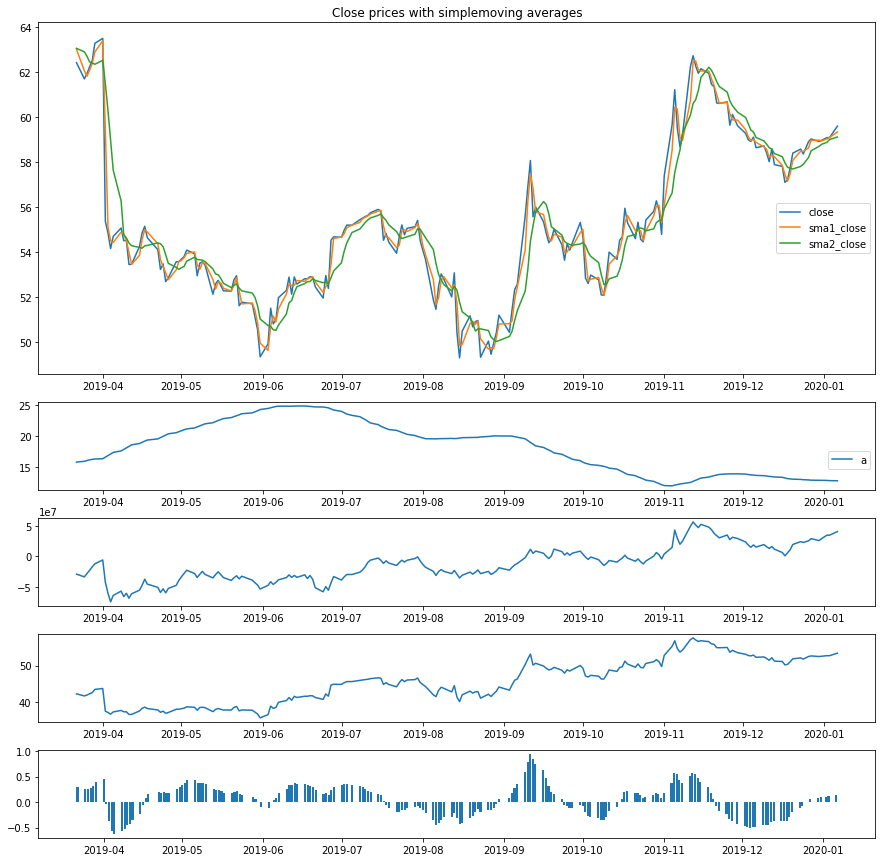

In [221]:
fig, (ax1, ax2,ax3,ax4, ax5) = plt.subplots(5, 1, figsize=(15,15), gridspec_kw={'height_ratios': [4,1,1,1,1]})

ax1.set_title('Close prices with simplemoving averages')

ax1.plot(x, y,)
ax1.legend(labels=('close','sma1_close','sma2_close'), loc='best', bbox_to_anchor=(1, 0.5))

ax2.plot(x, adx)
ax2.legend(labels=('adx'), loc='best', bbox_to_anchor=(1, 0.5))

ax3.plot(x, obv)

ax4.plot(x, rsi)

ax5.bar(x, macd)
# plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

In [15]:
y = wba_df['positions_close']
X = wba_df.drop(['positions_close', 'macd_hist'], axis=1)

logistic
(---------------------------------------)
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s
X_train Score:  0.8197611292073833
(-----------------------)
X_test Score:   0.8340113913751017
Precision Score 0.8365357152480263
Confusion Matrix [[457 127]
 [ 77 568]]
auc 0.9205054688329617
(---------------------------------------)


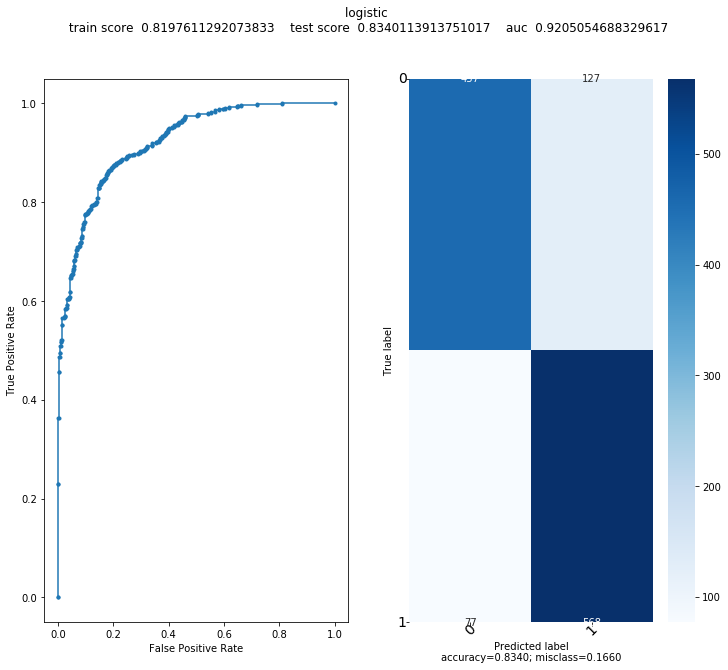

KNN
(---------------------------------------)
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
X_train Score:  0.8479913137893594
(-----------------------)
X_test Score:   0.7355573637103336
Precision Score 0.742688074777627
Confusion Matrix [[476 108]
 [217 428]]
auc 0.8171816926834448
(---------------------------------------)


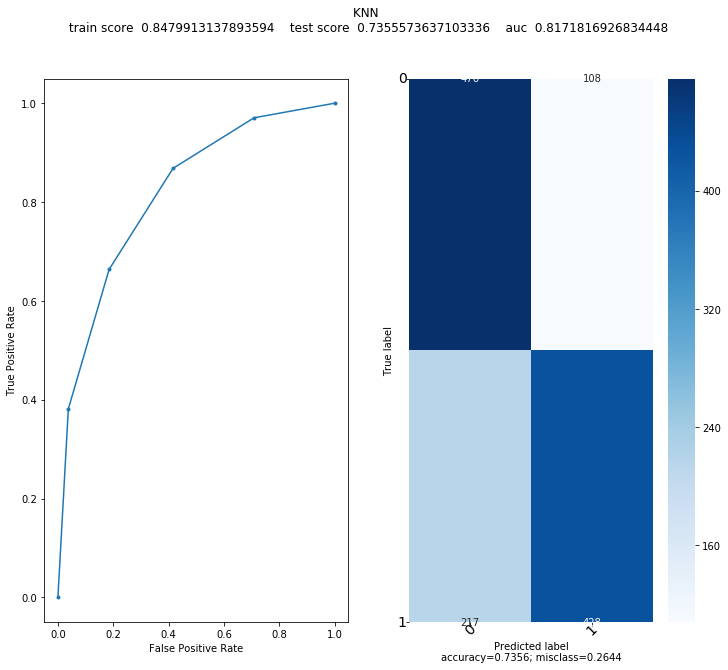

poly-SVM
(---------------------------------------)
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   2.8s
X_train Score:  0.7741585233441911
(-----------------------)
X_test Score:   0.7827502034174125
Precision Score 0.7842979880955587
Confusion Matrix [[426 158]
 [109 536]]
auc 0.8728602527344164
(---------------------------------------)


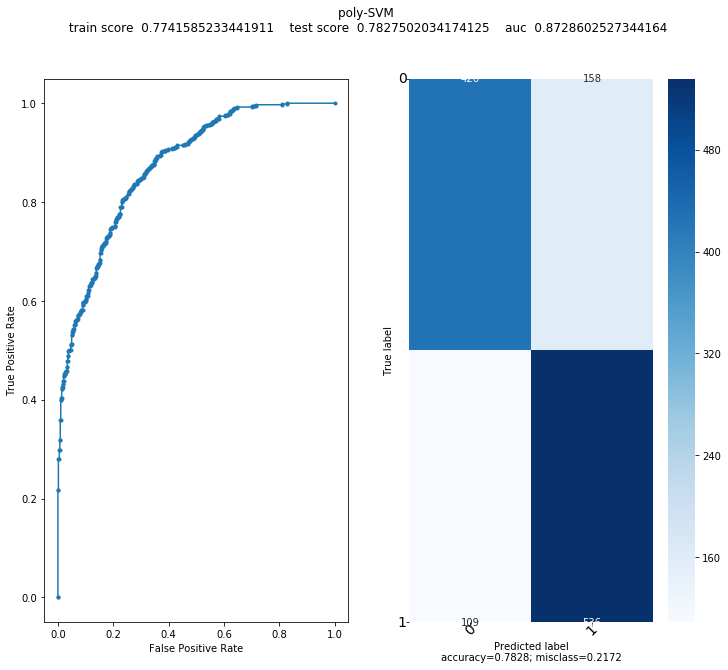

SVM
(---------------------------------------)
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   3.5s
X_train Score:  0.6104777415852335
(-----------------------)
X_test Score:   0.6257119609438568
Precision Score 0.6260336529141673
Confusion Matrix [[305 279]
 [181 464]]
auc 0.6636468620579803
(---------------------------------------)


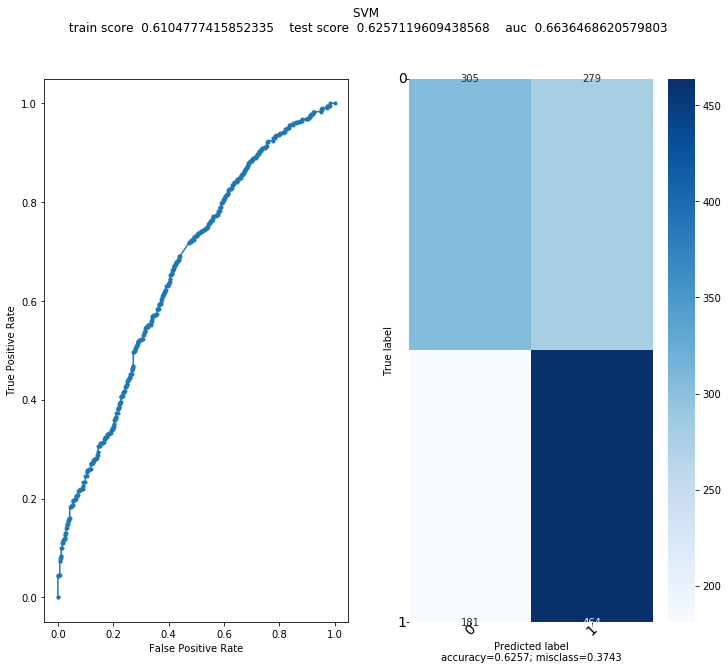

DecisionTree
(---------------------------------------)
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.2s
X_train Score:  0.8137893593919653
(-----------------------)
X_test Score:   0.6948738812042311
Precision Score 0.6982522796352584
Confusion Matrix [[437 147]
 [228 417]]
auc 0.7682515663162366
(---------------------------------------)


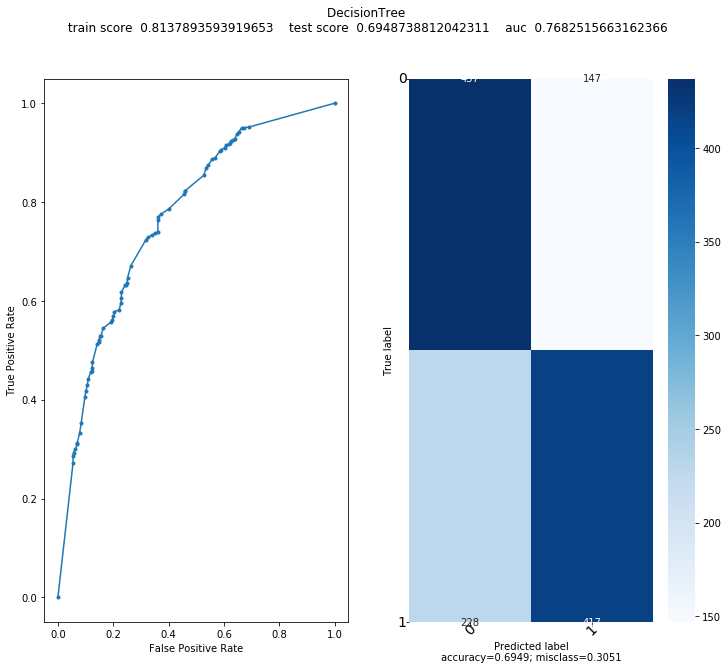

randomforest
(---------------------------------------)
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   1.4s
X_train Score:  0.7858306188925082
(-----------------------)
X_test Score:   0.7176566314076485
Precision Score 0.7193902803839982
Confusion Matrix [[376 208]
 [139 506]]
auc 0.7937851757459913
(---------------------------------------)


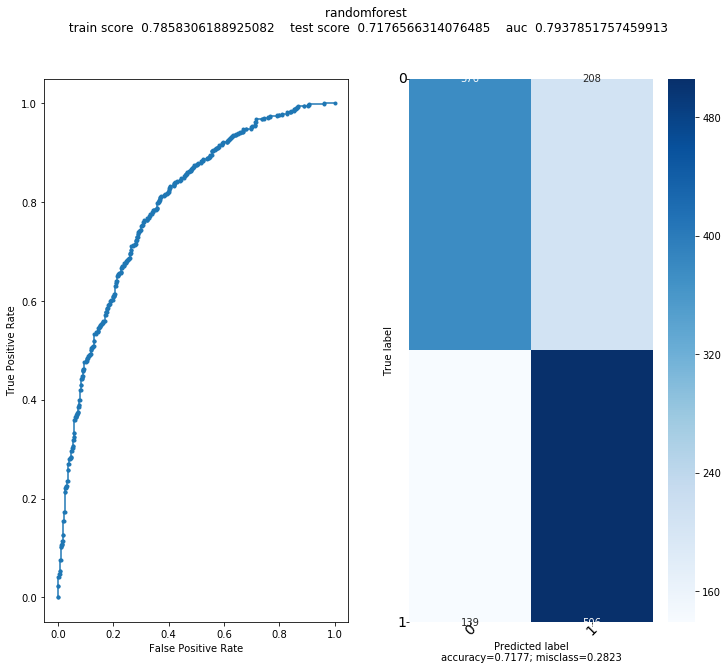

voting
(---------------------------------------)
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.2s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   2.4s
X_train Score:  0.8452768729641694
(-----------------------)
X_test Score:   0.8030919446704637
Precision Score 0.8031847065790948
Confusion Matrix [[452 132]
 [110 535]]
auc 0.88426250398216
(---------------------------------------)


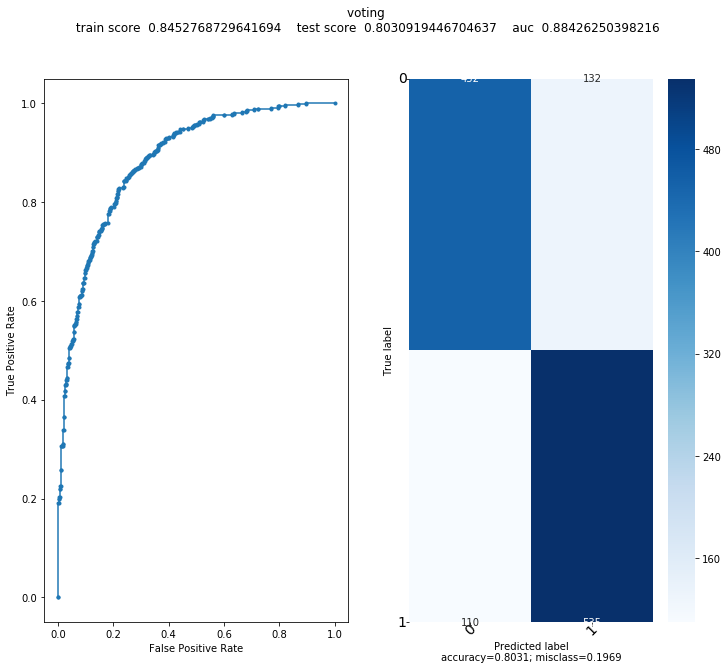

In [16]:
model_lst = ['logistic','KNN', 'poly-SVM', 'SVM', 'DecisionTree', 'randomforest', 'voting']
models = []
for model in model_lst:
    df = lf.model_pipe(x=X, y=y, model=model, scaler='minmax', cv_num=5, test_size=.25)
    models.append(df)
models_df = pd.concat(models)

In [24]:
! pip install statsmodels --user

     |████████████████████████████████| 8.0MB 5.4MB/s eta 0:00:01
     |████████████████████████████████| 235kB 53.3MB/s eta 0:00:01


In [25]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [26]:
result = adfuller(wba_df['close'])

In [27]:
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -0.5792284300856841
p-value: 0.8756068146016673
Critical Values:
	10%: -2.567083372425426
	5%: -2.8621287118318834
	1%: -3.4316822584676556


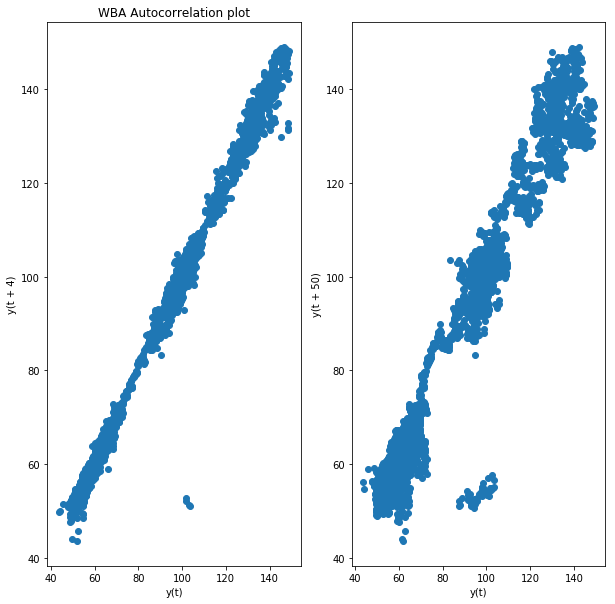

In [28]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
lag_plot(wba_df['close'], lag=4)
plt.title('WBA Autocorrelation plot')
plt.subplot(1,2,2)
lag_plot(wba_df['close'], lag=50)

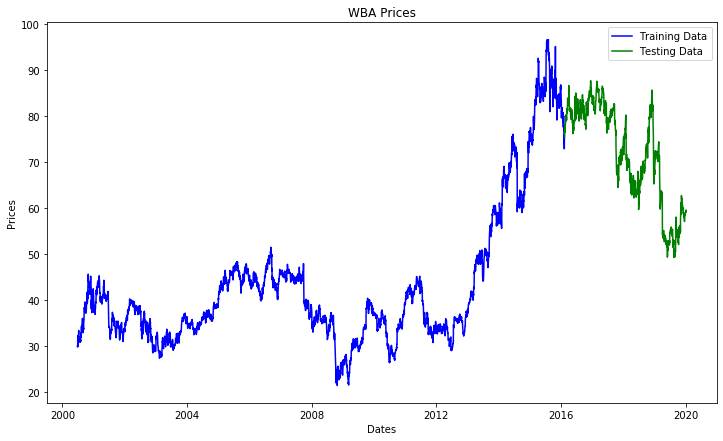

In [26]:
train_data, test_data = wba_df[0:int(len(wba_df)*0.8)], wba_df[int(len(wba_df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('WBA Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['close'], 'blue', label='Training Data')
plt.plot(test_data['close'], 'green', label='Testing Data')
# plt.xticks(np.arange(0,7982, 1300), wba_df.index[0:7982:1300])
plt.legend()


In [28]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +  np.abs(y_true))))

In [39]:
train_ar = train_data['close'].values
test_ar = test_data['close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 1.079
Symmetric mean absolute percentage error: 17.411


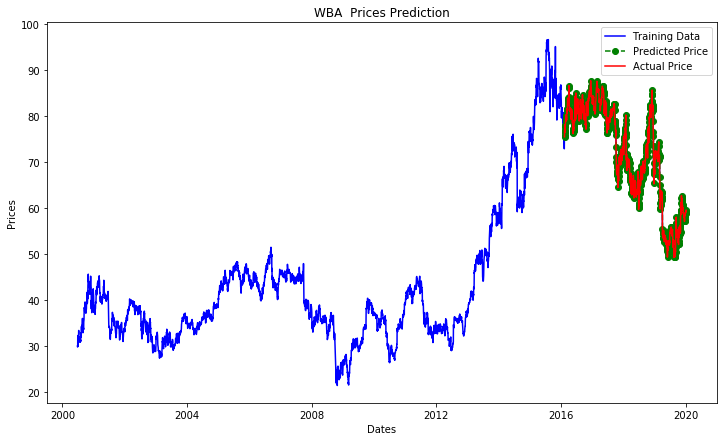

In [40]:
plt.figure(figsize=(12,7))
plt.plot(wba_df['close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['close'], color='red', label='Actual Price')
plt.title('WBA  Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
# plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

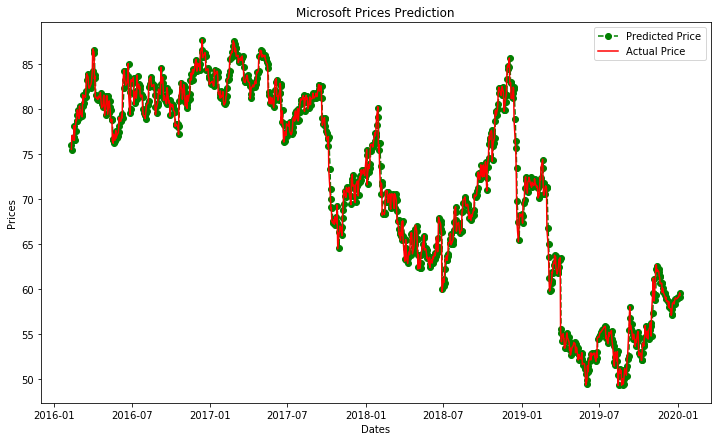

In [41]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_data.index, test_data['close'], color='red', label='Actual Price')
plt.legend()
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
# plt.xticks(np.arange(6386,7982, 300), df['Date'][6386:7982:300])
plt.legend()

In [42]:
print(model_fit.summary())

ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 4911
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -6063.808
Method:                       css-mle   S.D. of innovations              0.832
Date:                Wed, 08 Jan 2020   AIC                          12143.617
Time:                        13:47:50   BIC                          12195.611
Sample:                             1   HQIC                         12161.857
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.011      0.534      0.593      -0.016       0.028
ar.L1.D.y     -0.3080      0.690     -0.446      0.655      -1.661       1.045
ar.L2.D.y     -0.0420      0.019     -2.266      0.023      -0.078      -0.006
ar

In [43]:
print('predicted=%f, expected=%f' % (yhat, obs))

predicted=59.585042, expected=59.290000


In [33]:
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots

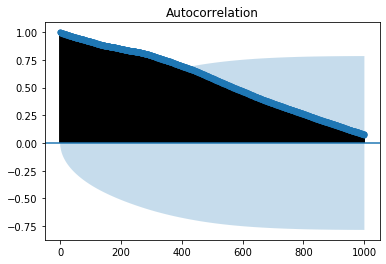

In [65]:
tsaplots.plot_acf(wba_df.close, lags=1000);

In [74]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return


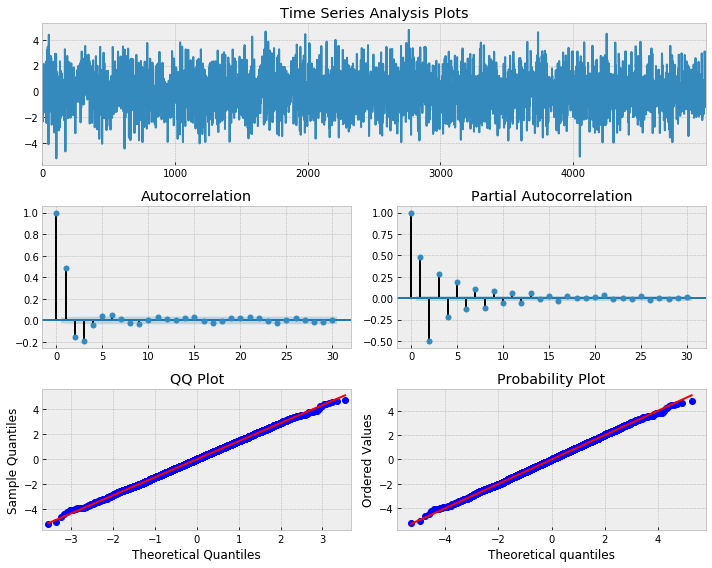

In [78]:
import statsmodels.tsa.api as smt
import scipy.stats as scs
# Simulate an ARMA(2, 2) model with alphas=[0.5,-0.25] and betas=[0.5,-0.3]
max_lag = 30

n = int(5000) # lots of samples to help estimates
burn = int(n/10) # number of samples to discard before fit

alphas = np.array([0.5, -0.25])
betas = np.array([0.5, -0.3])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

arma22 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=burn)
_ = tsplot(arma22, lags=max_lag)

ecasting.', ValueWarning)
/Users/fadisarraf/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/fadisarraf/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/fadisarraf/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/fadisarraf/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWar

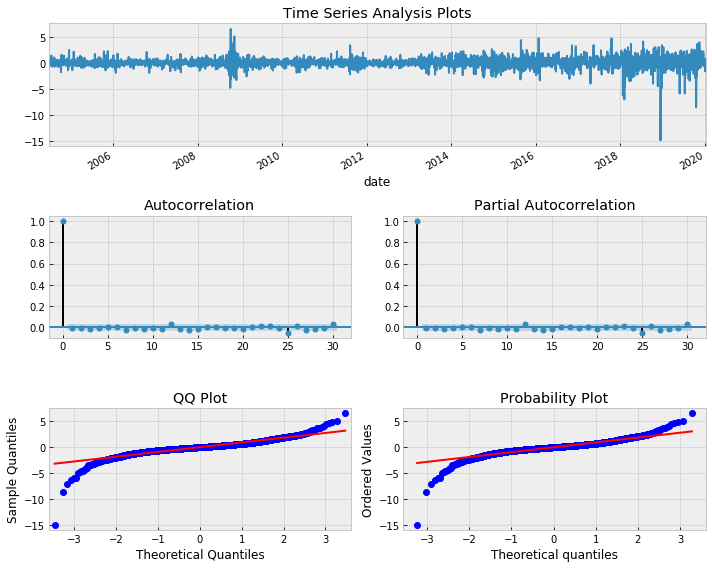

In [139]:
best_aic = np.inf 
best_order = None
best_mdl = None

p_rng = range(5) # [0,1,2,3]
q_rng = range(5)
d_rng = range(2) # [0,1]
for i in p_rng:
    for d in d_rng:
        for j in q_rng:
            try:
                tmp_mdl = smt.ARIMA(wba_df['close'].iloc[1000:], 
                                    order=(i,d,j)).fit(method='mle',
                                    trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: %6.2f | order: %s'%(best_aic, best_order))

# ARIMA model resid plot
_ = tsplot(best_mdl.resid, lags=30)

In [140]:
print(best_mdl.summary())

ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 3913
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5188.495
Method:                           mle   S.D. of innovations              0.911
Date:                Wed, 08 Jan 2020   AIC                          10386.990
Time:                        22:06:22   BIC                          10418.350
Sample:                             1   HQIC                         10398.119
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1.D.close    -1.0398      0.130     -8.029      0.000      -1.294      -0.786
ar.L2.D.close    -0.5279      0.111     -4.759      0.000      -0.745      -0.311
ma.L1.D.close     1.0143      0.136      7.449      0.000       0.747

In [141]:

from statsmodels.stats.stattools import jarque_bera
import statsmodels.stats as sms

score, pvalue, _, _ = jarque_bera(best_mdl.resid)

if pvalue < 0.10:
    print('We have reason to suspect the residuals are not normally distributed.')
else:
    print('The residuals seem normally distributed.')

sms.diagnostic.acorr_ljungbox(best_mdl.resid, lags=[20], boxpierce=False)


We have reason to suspect the residuals are not normally distributed.


(array([13.8865796]), array([0.83619972]))

In [142]:
n_steps = 21

f, err95, ci95 = best_mdl.forecast(steps=n_steps) # 95% CI
_, err99, ci99 = best_mdl.forecast(steps=n_steps, alpha=0.01) # 99% CI

idx = pd.date_range(wba_df.index[-1], periods=n_steps, freq='D')
fc_95 = pd.DataFrame(np.column_stack([f, ci95]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([ci99]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all.head()

forecast  lower_ci_95  lower_ci_99  upper_ci_95  upper_ci_99
2020-01-08  144.984323   143.198379   142.637194   146.770267   147.331451
2020-01-09  145.015222   142.521581   141.738022   147.508864   148.292423
2020-01-10  144.970251   141.980438   141.040970   147.960065   148.899532
2020-01-11  145.000701   141.527249   140.435812   148.474152   149.565589
2020-01-12  144.992780   141.128832   139.914691   148.856729   150.070869

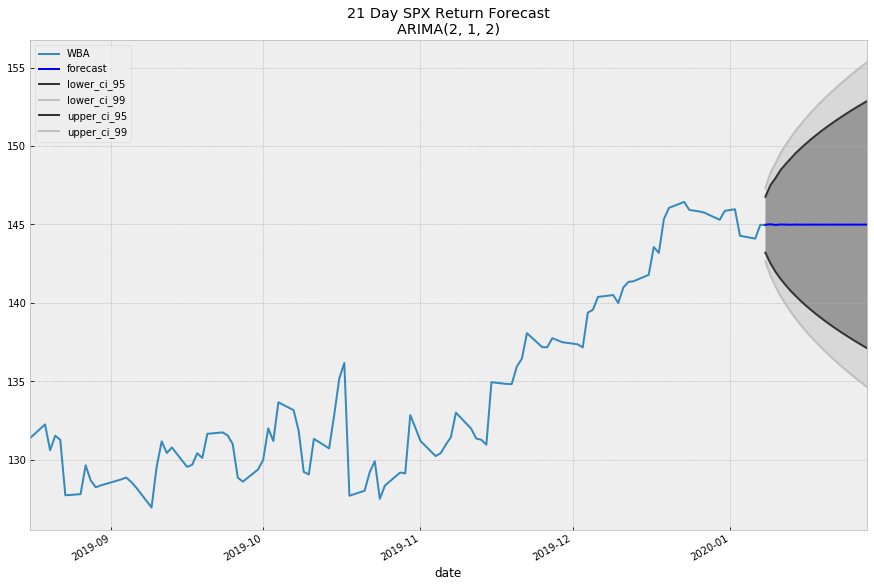

In [143]:
plt.style.use('bmh')
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

ts = wba_df['close'].iloc[-100:].copy()
ts.plot(ax=ax, label='WBA')
# in sample prediction
#pred = best_mdl.predict(ts.index[0], ts.index[-1])
#pred.plot(ax=ax, style='r-', label='In-sample prediction')

styles = ['b-', '0.2', '0.75', '0.2', '0.75']
fc_all.plot(ax=ax, style=styles)
plt.fill_between(fc_all.index, fc_all.lower_ci_95, fc_all.upper_ci_95, color='gray', alpha=0.7)
plt.fill_between(fc_all.index, fc_all.lower_ci_99, fc_all.upper_ci_99, color='gray', alpha=0.2)
plt.title('{} Day SPX Return Forecast\nARIMA{}'.format(n_steps, best_order))
plt.legend(loc='best', fontsize=10)

In [29]:
def RMSEfromResid(X):
    summ = 0
    for i in X:
        summ+=i**2
    return((summ/len(X))**0.5)

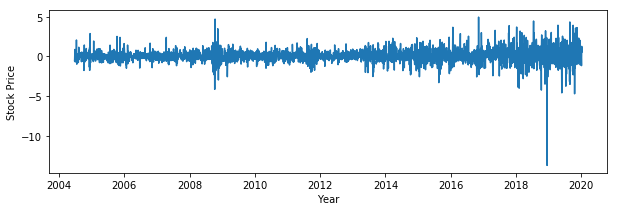

In [30]:
plt.figure(figsize=(10,3))
plt.plot(wba_df.index[1000:len(wba_df.index)-1], wba_df['close'][1000:].diff().dropna())
plt.ylabel('Stock Price')
plt.xlabel('Year')
plt.show()

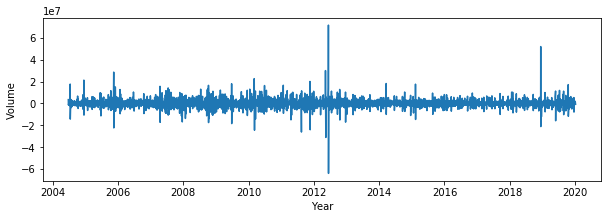

In [31]:
plt.figure(figsize=(10,3))
plt.plot(wba_df.index[1000:len(wba_df.index)-1], wba_df['volume'][1000:].diff().dropna())
plt.ylabel('Volume')
plt.xlabel('Year')
plt.show()

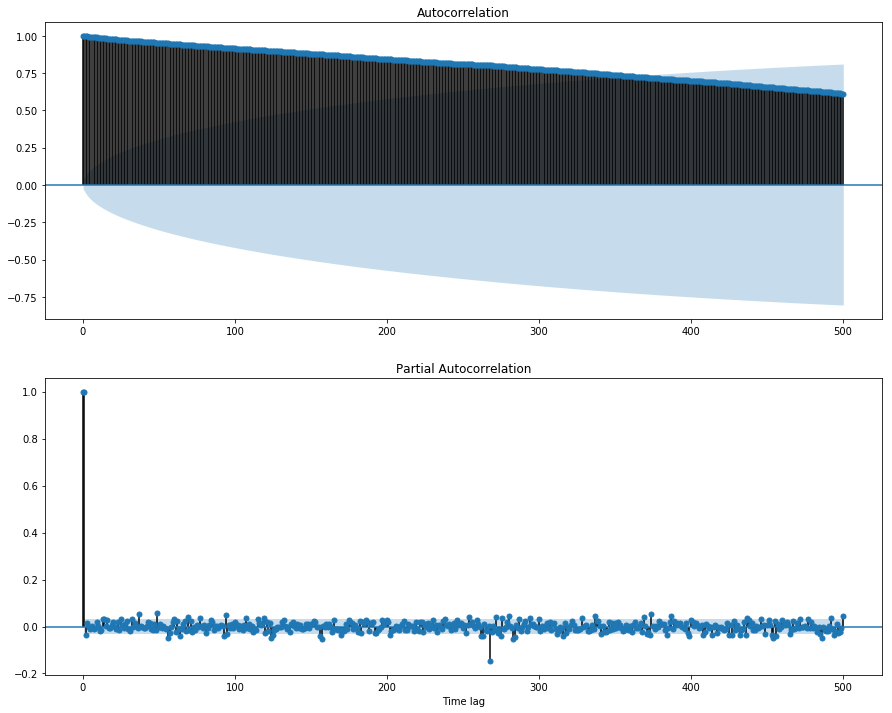

In [34]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf( wba_df['close'][1000:], lags=500, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf( wba_df['close'][1000:], lags=500, ax=ax2)
plt.xlabel('Time lag')
plt.show()

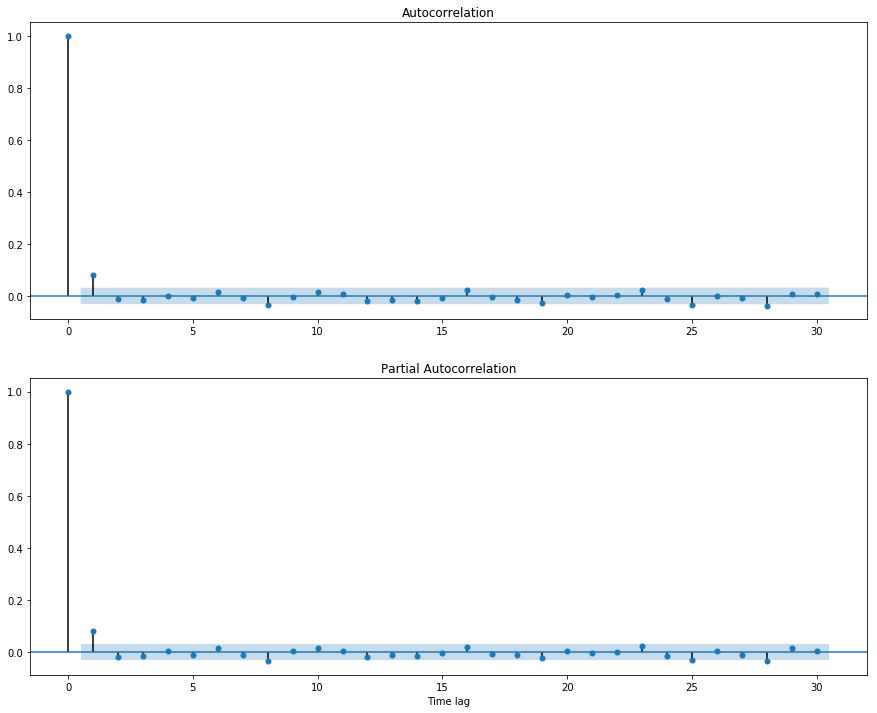

In [35]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf( wba_df['close'][1000:].diff().dropna(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf( wba_df['close'][1000:].diff().dropna(), lags=30, ax=ax2)
plt.xlabel('Time lag')
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  import sys


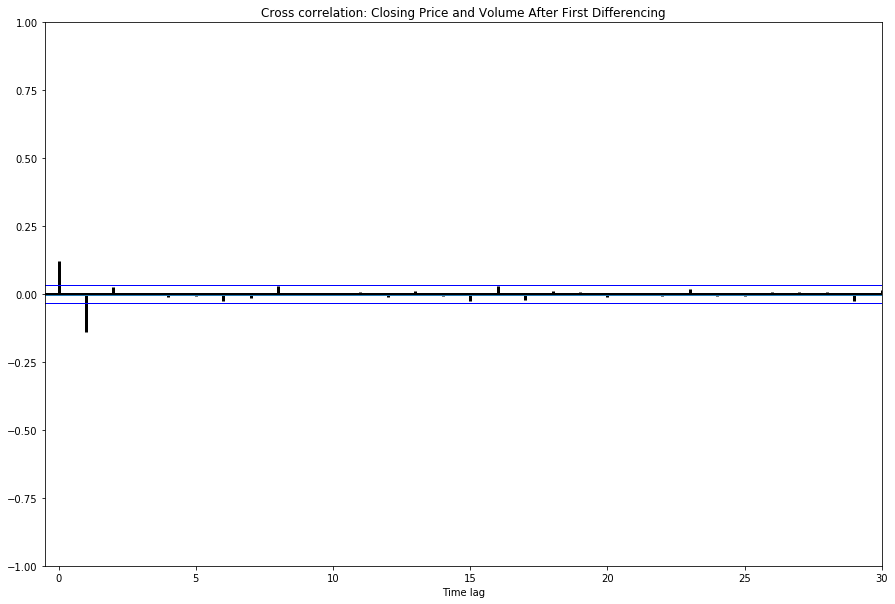

In [37]:
#Cross Correlation between differenced closing price and differenced volume
close_price = wba_df['close'][1000:].get_values()
xaxis = [x for x in range(-30,31)]
y_up = [(2/(len(close_price)**0.5)) for i in range(-30,31)]
y_down = [(-2/(len(close_price)**0.5)) for i in range(-30,31)]
close_diff = wba_df['close'][1000:].diff().dropna().get_values()
vol_diff =  wba_df['volume'][1000:].diff().dropna().get_values()

fig = plt.figure(figsize=(15, 10))
plt.xcorr(close_diff, vol_diff, usevlines=True, maxlags=30, normed=True, lw=3)
plt.ylim(-1, 1)
plt.xlim(-0.5, 30)
plt.axhline(0, color='black', lw=2)
plt.plot(xaxis, y_up, color='blue', lw=1)
plt.plot(xaxis, y_down, color='blue', lw=1)
plt.xlabel('Time lag')
plt.title('Cross correlation: Closing Price and Volume After First Differencing')
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


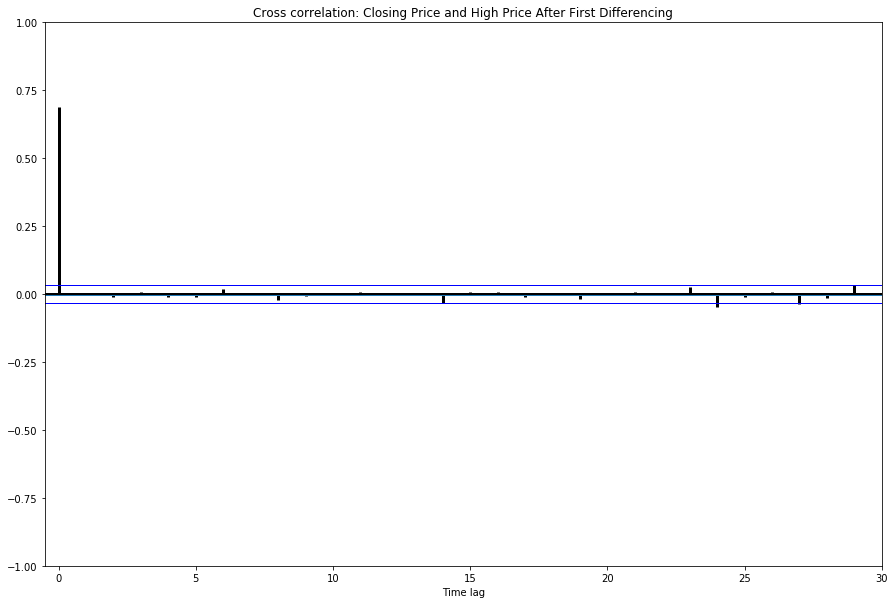

In [38]:
#Cross Correlation between differenced closing price and differenced high price 
high_diff =  wba_df['high'][1000:].diff().dropna().get_values()

fig = plt.figure(figsize=(15,10))

plt.xcorr(close_diff, high_diff,usevlines=True, maxlags=30, normed=True, lw=3)

plt.ylim(-1, 1)
plt.xlim(-0.5, 30)
plt.axhline(0, color='black', lw=2)
plt.plot(xaxis, y_up, color='blue', lw=1)
plt.plot(xaxis, y_down, color='blue', lw=1)
plt.xlabel('Time lag')
plt.title('Cross correlation: Closing Price and High Price After First Differencing')
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


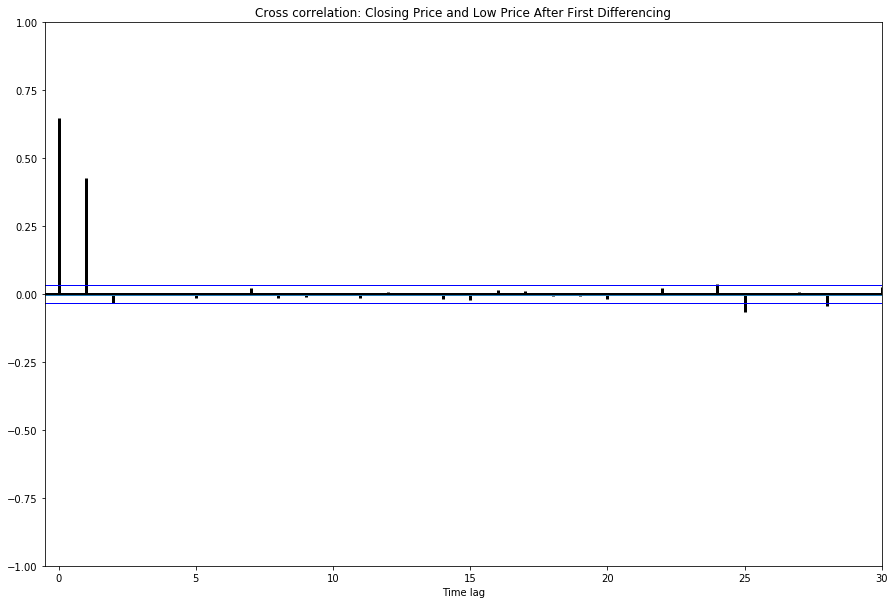

In [39]:
#Cross Correlation between differenced closing price and differenced low price
low_diff =  wba_df['low'][1000:].diff().dropna().get_values()

fig = plt.figure(figsize=(15,10))

plt.xcorr(close_diff,low_diff,usevlines=True, maxlags=30, normed=True, lw=3)

plt.ylim(-1, 1)
plt.xlim(-0.5, 30)
plt.axhline(0, color='black', lw=2)
plt.plot(xaxis, y_up, color='blue', lw=1)
plt.plot(xaxis, y_down, color='blue', lw=1)
plt.xlabel('Time lag')
plt.title('Cross correlation: Closing Price and Low Price After First Differencing')
plt.show()

In [43]:

from statsmodels.tsa.arima_model import ARIMAResults 
date = wba_df.index[1000:]
X = wba_df['close'][1000:].get_values()
size = int(len(X)*0.80)
train, test = X[0:size], X[size:len(X)]
date_test = date[size:]
def evaluate_arima_model(X, model_order):
    model_arima = ARIMA(X, order=model_order).fit(disp=0)
    AIC = ARIMAResults.aic(model_arima)
    BIC = ARIMAResults.bic(model_arima)
    LLF = model_arima.llf
    RMSE = RMSEfromResid(model_arima.resid)
    return([AIC, BIC, LLF, RMSE])

# import warnings
# warnings.filterwarnings("ignore")
# evaluate combinations of p, d and q values for an ARIMA model
p_values = [2,3,4]
d_values = [1]
q_values = [0,1,2,3]
data = []
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            # try:
            [AIC, BIC, LLF, RMSE] = evaluate_arima_model(train, order)
            print(order)
            data.append([order,AIC, BIC, LLF, RMSE])
            # except:
            #     continue

ARIMA_Models = pd.DataFrame(data,columns=['ARIMA', 'AIC', 'BIC', 'Maximum Log-Likelihood', 'RMSE'],dtype=float)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(2, 1, 0)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(3, 1, 0)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(4, 1, 0)
(4, 1, 2)
(4, 1, 3)


In [44]:
ARIMA_Models.sort_values(by='RMSE' )


ARIMA          AIC          BIC  Maximum Log-Likelihood      RMSE
10  (4, 1, 2)  5835.846675  5884.234425            -2909.923337  0.613267
7   (3, 1, 3)  5837.491237  5885.878987            -2910.745619  0.613428
2   (2, 1, 2)  5833.853058  5870.143871            -2910.926529  0.613463
11  (4, 1, 3)  5842.118179  5896.554398            -2912.059090  0.613686
6   (3, 1, 2)  5838.882497  5881.221778            -2912.441248  0.613761
3   (2, 1, 3)  5838.902855  5881.242136            -2912.451427  0.613763
9   (4, 1, 1)  5841.771174  5884.110456            -2913.885587  0.614045
8   (4, 1, 0)  5840.888116  5877.178928            -2914.444058  0.614154
5   (3, 1, 1)  5840.914354  5877.205167            -2914.457177  0.614157
4   (3, 1, 0)  5838.929746  5869.172089            -2914.464873  0.614158
1   (2, 1, 1)  5840.997126  5871.239470            -2915.498563  0.614361
0   (2, 1, 0)  5841.780313  5865.974188            -2916.890157  0.614635

In [49]:
history = [x for x in train]
predictions = list()
data=list()
#len_test = len(test)
len_test= len(test)
for t in range(len_test):
    model_arima = ARIMA(endog = history, order=(2, 1, 2)).fit(disp=0)
    output = model_arima.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    data.append([date_test[t], obs, yhat])
    
RMSE = (mean_squared_error(test, predictions))**0.5
arima_results = pd.DataFrame(data,columns=['Period','Actual Price', 'Predicted Price'],dtype=float)
print('Test RMSE: %.3f' % RMSE)
# plot
plt.rcParams['figure.figsize'] = (15,10)
plt.plot(date_test, test, color='Blue', label='ACTUAL', marker='x')
plt.plot(date_test, predictions, color='green', label='PREDICTED', marker='x')
plt.legend(loc='upper right')
plt.show()
arima_pred = predictions
arima_RMSE = RMSE

KeyboardInterrupt: 

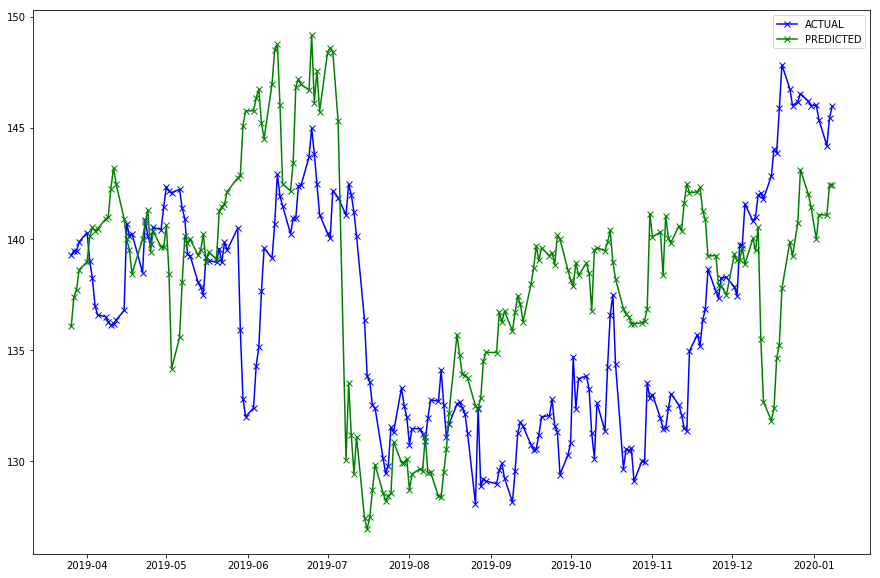

In [48]:
plt.rcParams['figure.figsize'] = (15,10)
plt.plot(date_test[-200:], test[-200:], color='Blue', label='ACTUAL', marker='x')
plt.plot(date_test[-200:], predictions[-200:], color='green', label='PREDICTED', marker='x')
plt.legend(loc='upper right')
plt.show()
arima_pred = predictions
arima_RMSE = RMSE

In [23]:
obv,_ = cl.get_obv('WBA') 

In [32]:
vwap,_ = cl.get_vwap('MSFT') 

In [33]:
vwap.head()

VWAP
date                         
2019-11-26 09:45:00  151.7501
2019-11-26 10:00:00  151.7963
2019-11-26 10:15:00  151.8558
2019-11-26 10:30:00  151.8758
2019-11-26 10:45:00  151.8878

In [45]:
wba_intra,_ = cl.get_intraday('WBA', '5min')

In [46]:
wba_intra.head()

1. open  3. low  2. high  4. close  5. volume
date                                                              
2019-12-26 10:15:00  58.7799  58.660   58.780   58.6800    13909.0
2019-12-19 14:50:00  57.9000  57.840   57.910   57.8400    29385.0
2019-12-27 12:45:00  58.5900  58.570   58.615   58.6000    18951.0
2019-12-27 11:20:00  58.7400  58.725   58.780   58.7764    25553.0
2019-12-20 14:20:00  58.5200  58.520   58.570   58.5200    12050.0

In [56]:
wba_intra.columns = ['open', 'low', 'high','close','volume']

In [57]:
wba_intra.head()

open     low    high    close   volume
date                                                          
2019-12-26 10:15:00  58.7799  58.660  58.780  58.6800  13909.0
2019-12-19 14:50:00  57.9000  57.840  57.910  57.8400  29385.0
2019-12-27 12:45:00  58.5900  58.570  58.615  58.6000  18951.0
2019-12-27 11:20:00  58.7400  58.725  58.780  58.7764  25553.0
2019-12-20 14:20:00  58.5200  58.520  58.570  58.5200  12050.0

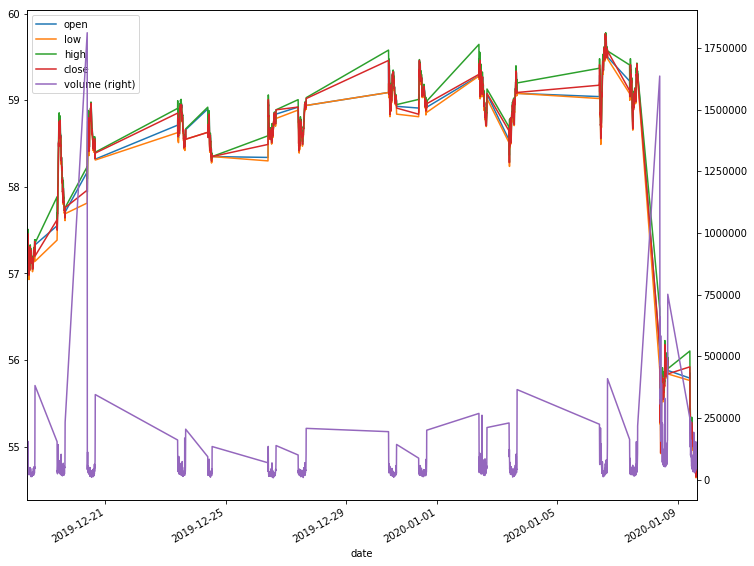

In [59]:
wba_intra.plot(figsize=(12,10), secondary_y = 'volume')